In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned

Набор данных включает в себя:

Gender: полезен для анализа различий в успеваемости между учащимися мужского и женского пола.

Race/Ethnicity: Позволяет анализировать тенденции в успеваемости в разных расовых или этнических группах.

Parental Level of Education: Указывает на уровень образования в семье учащегося.

Lunch: Показывает, получают ли учащиеся обед бесплатно или со скидкой, что часто является социально-экономическим показателем.

Test Preparation Course: Показывает, прошли ли учащиеся курс подготовки к тестированию, что может повлиять на их успеваемость.

math_score: позволяет оценить успеваемость каждого учащегося по математике, которая используется для расчета средних показателей или тенденций в различных демографических группах.

reading_score: Измеряет успеваемость в чтении, позволяя получить представление об уровне грамотности и понимания учащимися.

writing_score: Оценивает навыки письма учащихся, которые могут быть проанализированы для оценки общей грамотности и выразительности.

In [17]:
df = pd.read_csv('Cleaned_Students_Performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [21]:
corr_matrix = df.corr()
corr_matrix

C:\Users\rshir\AppData\Local\Temp\ipykernel_10832\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
gender,1.000000,0.021372,0.006028,0.167982,-0.244313,-0.301225,-0.130861,-0.130861
lunch,0.021372,1.000000,-0.017044,0.350877,0.229560,0.245769,0.290064,0.290064
test_preparation_course,0.006028,-0.017044,1.000000,0.177702,0.241780,0.312946,0.256710,0.256710
math_score,0.167982,0.350877,0.177702,1.000000,0.817580,0.802642,0.918746,0.918746
reading_score,-0.244313,0.229560,0.241780,0.817580,1.000000,0.954598,0.970331,0.970331
writing_score,-0.301225,0.245769,0.312946,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,-0.130861,0.290064,0.256710,0.918746,0.970331,0.965667,1.000000,1.000000
average_score,-0.130861,0.290064,0.256710,0.918746,0.970331,0.965667,1.000000,1.000000


In [23]:
corr_matrix.math_score

gender                     0.167982
lunch                      0.350877
test_preparation_course    0.177702
math_score                 1.000000
reading_score              0.817580
writing_score              0.802642
total_score                0.918746
average_score              0.918746
Name: math_score, dtype: float64

Text(0, 0.5, 'Math Score')

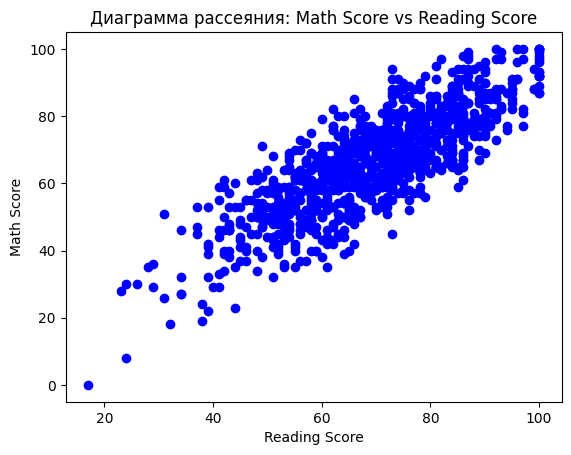

In [ ]:
plt.scatter(df['reading_score'], df['math_score'], color='blue', label='Данные')
plt.title('Диаграмма рассеяния: math_score vs reading_score')
plt.xlabel('reading_score')
plt.ylabel('math_score')

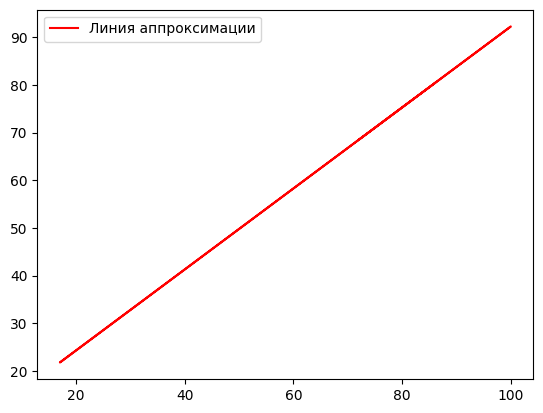

In [26]:
# Подготовка данных для регрессии
X = df[['reading_score']]
y = df['math_score']

# Создание модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получение предсказанных значений
y_pred = model.predict(X)

# Построение линии аппроксимации
plt.plot(df['reading_score'], y_pred, color='red', label='Линия аппроксимации')
plt.legend()
plt.show()

In [27]:
# Вычисление R^2
r_squared = model.score(X, y)
print(f'Коэффициент детерминации R^2: {r_squared:.2f}')

Коэффициент детерминации R^2: 0.67


In [29]:
# Случайная выборка ~1/3 наблюдений
random_sample = df.sample(frac=1/3, random_state=42)  # random_state для воспроизводимости
# Стратифицированная выборка по полу
stratified_sample = df.groupby('race_ethnicity').apply(lambda x: x.sample(frac=1/3)).reset_index(drop=True)

In [34]:
random_sample.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
521,0,group C,associate's degree,1,0,91,86,84,261,87.0
737,0,group B,some college,0,1,53,66,73,192,64.0


In [35]:
# Средние значения
mean_random = random_sample[['math_score', 'reading_score', 'writing_score']].mean()
mean_stratified = stratified_sample[['math_score', 'reading_score', 'writing_score']].mean()
mean_population = df[['math_score', 'reading_score', 'writing_score']].mean()

print("Средние значения случайной выборки:")
print(mean_random)

print("\nСредние значения стратифицированной выборки:")
print(mean_stratified)

print("\nСредние значения генеральной выборки:")
print(mean_population)

Средние значения случайной выборки:
math_score       65.051051
reading_score    68.150150
writing_score    66.990991
dtype: float64

Средние значения стратифицированной выборки:
math_score       66.255255
reading_score    69.657658
writing_score    68.222222
dtype: float64

Средние значения генеральной выборки:
math_score       66.089
reading_score    69.169
writing_score    68.054
dtype: float64


In [36]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Используем ddof=1 для выборочной оценки
    n = len(data)
    h = std_dev * stats.t.ppf((1 + confidence) / 2., n - 1) / np.sqrt(n)
    return mean - h, mean + h

# Доверительные интервалы для случайной выборки
ci_random_math = confidence_interval(random_sample['math_score'])
ci_random_reading = confidence_interval(random_sample['reading_score'])
ci_random_writing = confidence_interval(random_sample['writing_score'])

# Доверительные интервалы для стратифицированной выборки
ci_stratified_math = confidence_interval(stratified_sample['math_score'])
ci_stratified_reading = confidence_interval(stratified_sample['reading_score'])
ci_stratified_writing = confidence_interval(stratified_sample['writing_score'])

# Доверительные интервалы для генеральной выборки
ci_population_math = confidence_interval(df['math_score'])
ci_population_reading = confidence_interval(df['reading_score'])
ci_population_writing = confidence_interval(df['writing_score'])

print("\nДоверительные интервалы случайной выборки:")
print(f"Math: {ci_random_math}, Reading: {ci_random_reading}, Writing: {ci_random_writing}")

print("\nДоверительные интервалы стратифицированной выборки:")
print(f"Math: {ci_stratified_math}, Reading: {ci_stratified_reading}, Writing: {ci_stratified_writing}")

print("\nДоверительные интервалы генеральной выборки:")
print(f"Math: {ci_population_math}, Reading: {ci_population_reading}, Writing: {ci_population_writing}")


Доверительные интервалы случайной выборки:
Math: (63.375709020725715, 66.72639308137639), Reading: (66.49474966109088, 69.80555063920943), Writing: (65.25946326119039, 68.7225187207916)

Доверительные интервалы стратифицированной выборки:
Math: (64.66308985907436, 67.84742065143614), Reading: (68.1938192654831, 71.1214960498322), Writing: (66.65268199855, 69.79176244589446)

Доверительные интервалы генеральной выборки:
Math: (65.14805983128305, 67.02994016871695), Reading: (68.26298967902613, 70.07501032097386), Writing: (67.11103828107223, 68.99696171892778)
